In [ ]:
#Google Drive

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
#ls 'gdrive/MyDrive/Colab Notebooks/TABLEAU'


In [ ]:
ls-la gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo

total 23946
-rw------- 1 root root  1006942 May  2  2023 '9.1 Pronósticos con Series de Tiempo.pptx'
-rw------- 1 root root   927029 May  2  2023 '9.2 Herramientas de visualizacion.pdf'
-rw------- 1 root root  1064047 Apr 30 02:13 '9.3 Time Series ARIMA.ipynb'
-rw------- 1 root root  1176480 May 18  2023 '9.4 Modelos ARIMA.ipynb'
-rw------- 1 root root   382265 May 16  2022  coin_Bitcoin.csv
-rw------- 1 root root   240064 May 12  2023  coin_Bitcoin.xlsx
-rw------- 1 root root  1107707 May 18  2022 'Copia de Sample - Superstore.xlsm'
-rw------- 1 root root 12951091 May 16  2022  Forecasting_with_Univariate_Box_-_Jenkins_Models.pdf
-rw------- 1 root root  2770903 May 16  2022 'GARCH_Models_Structure_Statistical_Inference_and_Financial_Applications1 (1).pdf'
-rw------- 1 root root  1298601 May 18  2022 'Superstore(1).xlsx'
-rw------- 1 root root  1592661 May  4  2023  Superstore.xlsx


In [ ]:
#pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import xlrd

In [ ]:
#importing libraries
#import pandas as pd #for reading and processing data

#superstore = pd.read_excel('gdrive/MyDrive/UNAM/Temas_Selectos_de_Computacion/Tema_3_Inteligencia_de_Negocios/Copia de Sample - Superstore.xls')
#superstore.head(5)

In [ ]:
cd gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo

/content/gdrive/MyDrive/2024-II_Analisis_de_Regresion/Series_de_Tiempo


In [ ]:
#importing libraries
import pandas as pd #for reading and processing data

superstore = pd.read_excel('Superstore.xlsx')
superstore.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,AÑO,MES,ANO-MES
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,2016-11-01
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,2016-11-01
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,2016-06-01
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,2015-10-01
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,2015-10-01


In [ ]:
superstore.shape

(9994, 24)

In [ ]:
#fetching required columns
data = superstore[['Order Date','Sales']]
data = data.sort_values(by = 'Order Date')

In [ ]:
print(data.head())
print('')
print(data.tail())

     Order Date    Sales
7980 2014-01-03   16.448
739  2014-01-04   11.784
740  2014-01-04  272.736
741  2014-01-04    3.540
1759 2014-01-05   19.536

     Order Date    Sales
5091 2017-12-30    3.024
908  2017-12-30   52.776
907  2017-12-30   90.930
1296 2017-12-30   13.904
906  2017-12-30  323.136


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 7980 to 906
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 234.2 KB


In [ ]:
#creating a ts object
  #data['Order Date'] = pd.to_datetime(data['Order Date'])
data.index = data['Order Date']

In [ ]:
data.head(5)

,Order Date,Sales
Order Date,,
2014-01-03,2014-01-03,16.448
2014-01-04,2014-01-04,11.784
2014-01-04,2014-01-04,272.736
2014-01-04,2014-01-04,3.540
2014-01-05,2014-01-05,19.536


In [ ]:
data.drop(columns=['Order Date'],inplace=True, axis=1)

In [ ]:
data.head(5)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536


In [ ]:
data = data.resample('M').sum()

In [ ]:
data.head(5)

,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


In [ ]:
data.shape

(48, 1)

In [ ]:
data

,Sales
Order Date,
2014-01-31,14236.8950
2014-02-28,4519.8920
2014-03-31,55691.0090
2014-04-30,28295.3450
2014-05-31,23648.2870
2014-06-30,34595.1276
2014-07-31,33946.3930
2014-08-31,27909.4685
2014-09-30,81777.3508


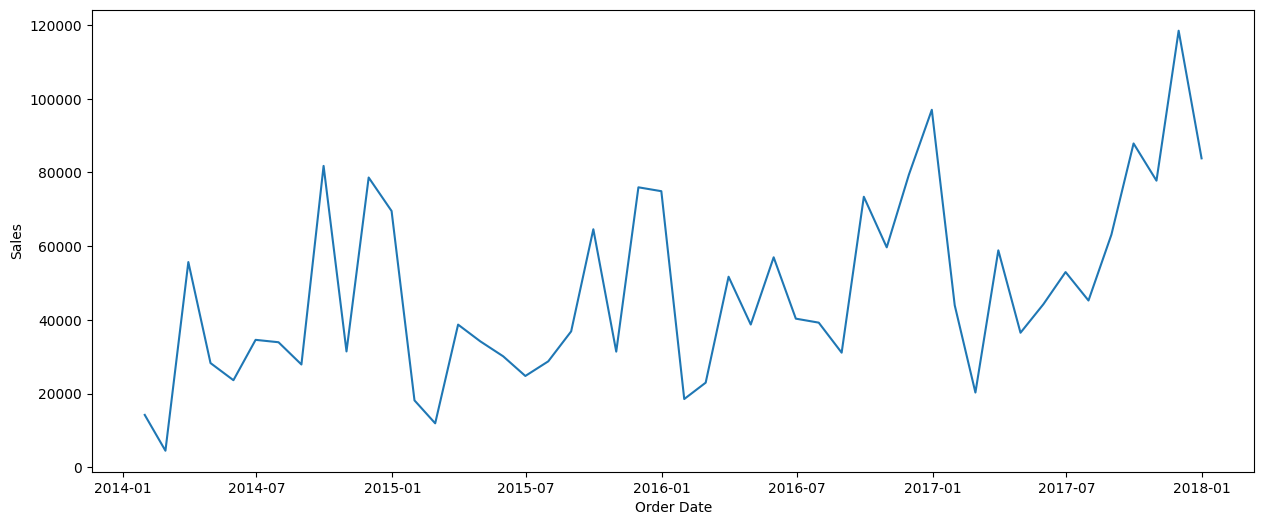

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize = (15,6))
sns.lineplot(x = 'Order Date', y = 'Sales', data = data)
plt.show()

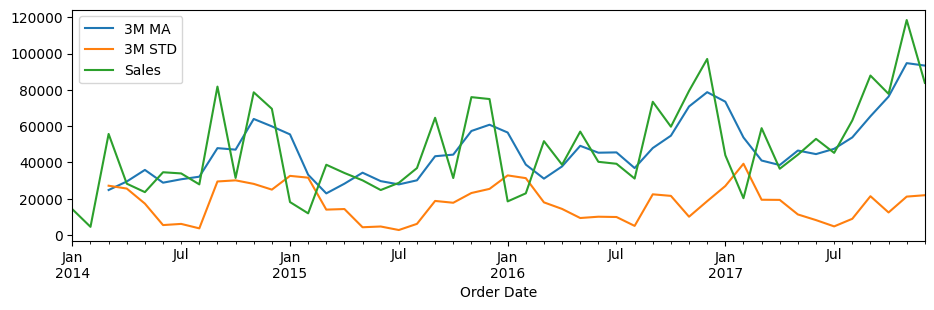

In [ ]:
data['Sales'].rolling(3).mean().plot(label="3M MA",figsize=(11,3))
data['Sales'].rolling(3).std().plot(label="3M STD")
data['Sales'].plot(label="Sales")
plt.legend()

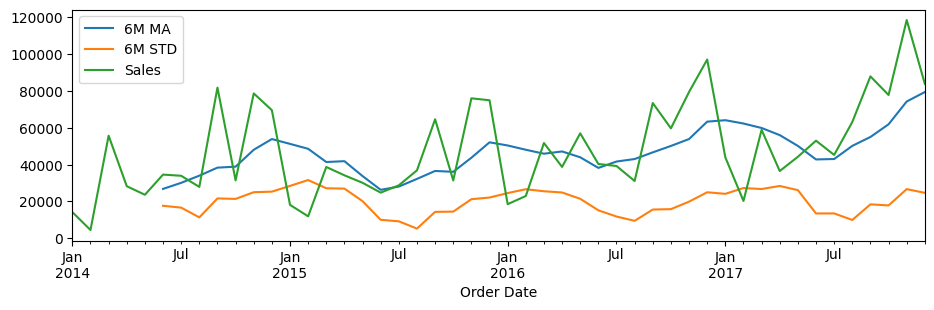

In [ ]:
data['Sales'].rolling(6).mean().plot(label="6M MA",figsize=(11,3))
data['Sales'].rolling(6).std().plot(label="6M STD")
data['Sales'].plot(label="Sales")
plt.legend()

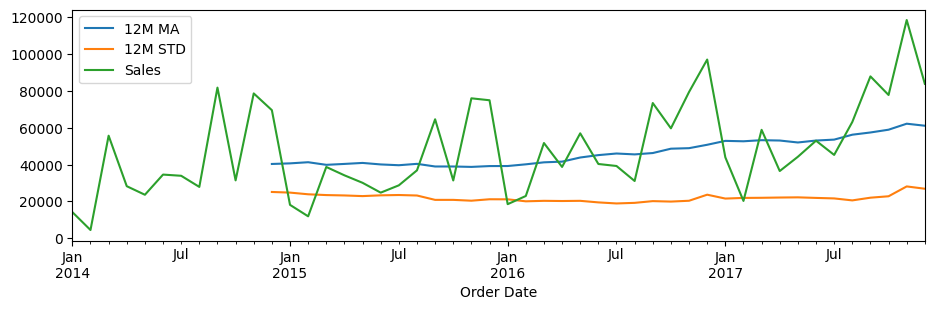

In [ ]:
data['Sales'].rolling(12).mean().plot(label="12M MA",figsize=(11,3))
data['Sales'].rolling(12).std().plot(label="12M STD")
data['Sales'].plot(label="Sales")
plt.legend()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

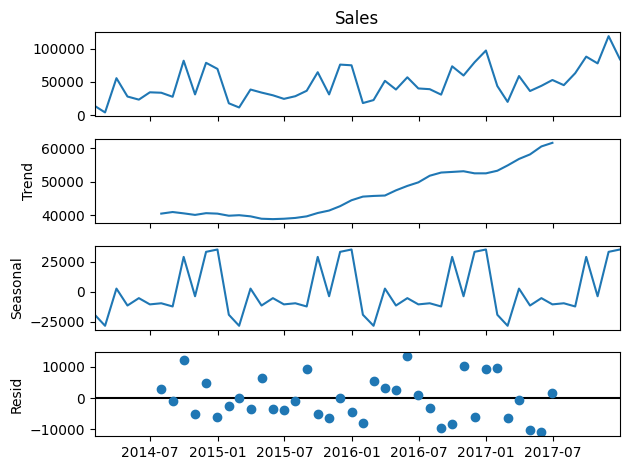

In [ ]:
decomp=seasonal_decompose(data['Sales'])
fig=decomp.plot()
fig.figsize=(17,9)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
fuller_test=adfuller(data['Sales'])
fuller_test

(-4.493767844002665,
 0.00020180198458237758,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 848.774903223632)

P < 0.01

In [ ]:
def test_p_vale(data):
  fuller_test=adfuller(data)
  print('P-value',fuller_test[1])
  print('*------------------------------------------------------*')
  if fuller_test[1]<0.01:
    print('rechazar hipotesis nula, los datos son estacionales')
  else:
    print('no rechzar la hipotesis nula, los datos no son estacionarios')

test_p_vale(data['Sales'])

P-value 0.00020180198458237758
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


<Axes: xlabel='Order Date'>

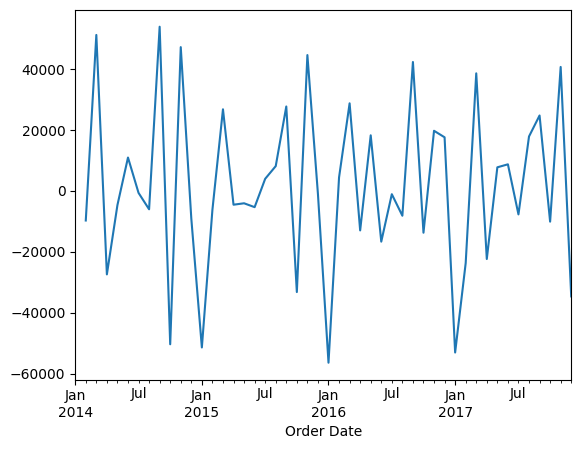

In [ ]:
data['1st_dif']=data['Sales']-data['Sales'].shift(1)
data['1st_dif'].plot()

In [ ]:
test_p_vale(data['1st_dif'].dropna())

P-value 4.653163912897081e-15
*------------------------------------------------------*
rechazar hipotesis nula, los datos son estacionales


ya no es necesario continuar revisando otras diferenciaones

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

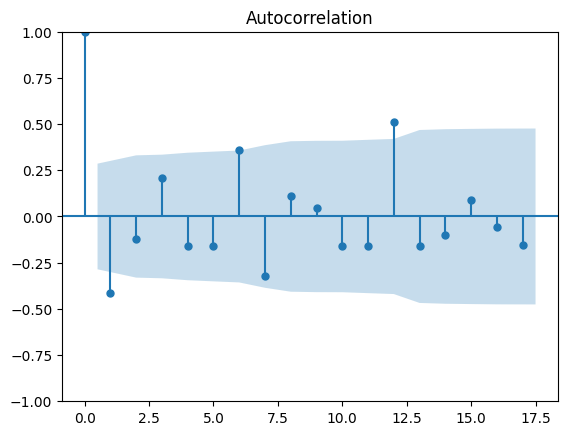

In [ ]:
first_diff=plot_acf(data['1st_dif'].dropna())

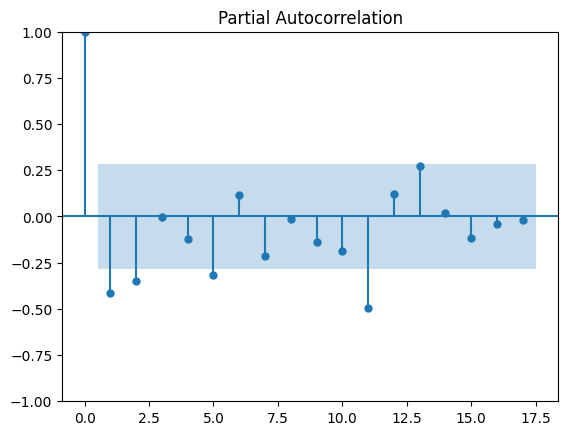

In [ ]:
sec_diff=plot_pacf(data['1st_dif'].dropna())

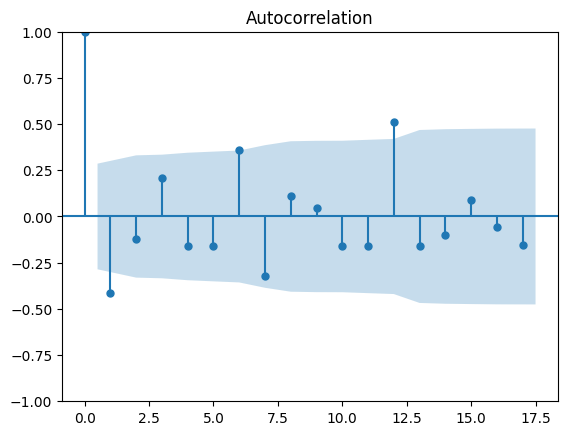

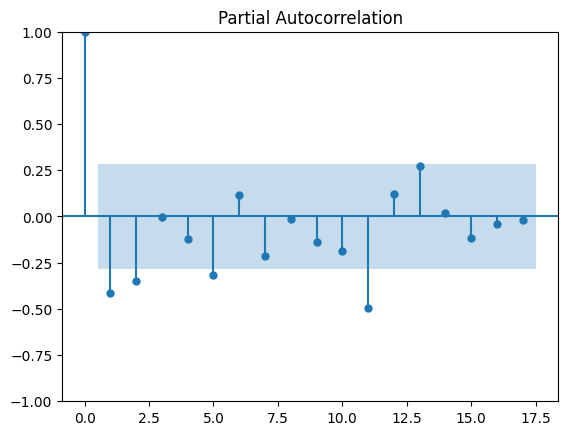

In [ ]:
p1=plot_acf(data['1st_dif'].dropna())
p2=plot_pacf(data['1st_dif'].dropna())
fig.figsize=(11,4)

In [ ]:
##########################
## Holt’s Linear Method ##
##########################

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
import dateutil
import datetime
import warnings
warnings.filterwarnings('ignore')

#superstore = pd.read_excel('gdrive/MyDrive/UNAM/Temas_Selectos_de_Computacion/Tema_3_Inteligencia_de_Negocios/Sample - Superstore.xls')
superstore = pd.read_excel('Superstore.xlsx')

#fetching required columns
data = superstore[['Order Date','Sales']]
data = data.sort_values(by = 'Order Date')

#creating a ts object
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.index = data['Order Date']
data.drop(columns=['Order Date'],inplace=True, axis=1)
data = data.resample('M').sum()

#use for training entire dataset
data = data[:-(6)]

#create future dataset
step = dateutil.relativedelta.relativedelta(months=1)
start = data.index[len(data)-1] + step
index = pd.date_range(start, periods=6, freq='M')
columns = ['Sales']
df = pd.DataFrame(index=index, columns=columns)
df = df.fillna(0)

#Fit the model
model = Holt(np.asarray(data['Sales'])).fit(smoothing_level = 0.4,smoothing_slope = 0.3)
df['Net Sales']=model.forecast(6)
df = df.fillna(0)
x = pd.concat([data,df])
x

,Sales,Net Sales
2014-01-31,14236.8950,NaN
2014-02-28,4519.8920,NaN
2014-03-31,55691.0090,NaN
2014-04-30,28295.3450,NaN
2014-05-31,23648.2870,NaN
2014-06-30,34595.1276,NaN
2014-07-31,33946.3930,NaN
2014-08-31,27909.4685,NaN
2014-09-30,81777.3508,NaN
2014-10-31,31453.3930,NaN


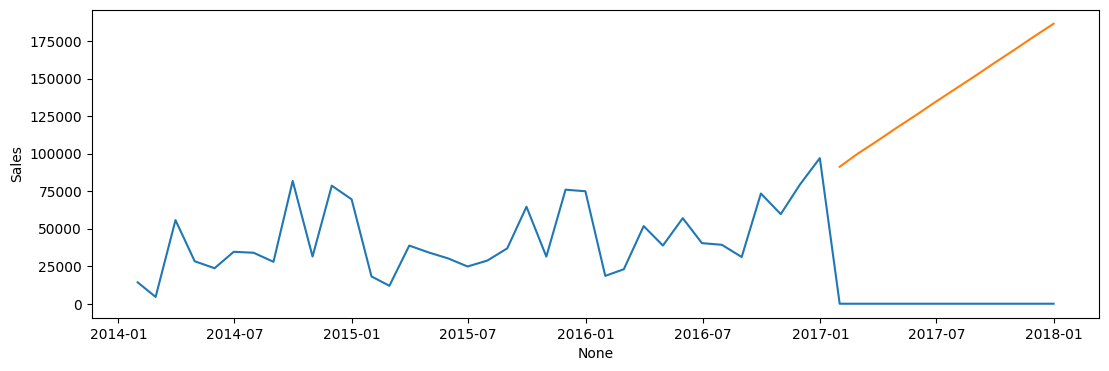

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (13,4))
sns.lineplot(x= x.index, y = 'Sales', data = x)
sns.lineplot(x= x.index, y = 'Net Sales', data = x)
plt.show()

In [ ]:
#################################
## Holt’s Holt-Winter’s Method ##
#################################

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
import dateutil
warnings.filterwarnings('ignore')

#fetching required columns
data = superstore[['Order Date','Sales']]
data = data.sort_values(by = 'Order Date')

#creating a ts object
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.index = data['Order Date']
data.drop(columns=['Order Date'],inplace=True, axis=1)
data = data.resample('M').sum()
data = data[:-(12)]

#create future dataset
step = dateutil.relativedelta.relativedelta(months=1)
start = data.index[len(data)-1] + step
index = pd.date_range(start, periods=12, freq='M')
columns = ['Sales']
df = pd.DataFrame(index=index, columns=columns)
#df = df.fillna(0)

#Fit Model
fit1 = ExponentialSmoothing(np.asarray(data['Sales']) ,seasonal_periods=12 ,trend='mul', seasonal='add', ).fit()
df['Net Sales']=fit1.forecast(12)
#df = df.fillna(0)
x = pd.concat([data, df])


In [ ]:
x

,Sales,Net Sales
2014-01-31,14236.8950,NaN
2014-02-28,4519.8920,NaN
2014-03-31,55691.0090,NaN
2014-04-30,28295.3450,NaN
2014-05-31,23648.2870,NaN
2014-06-30,34595.1276,NaN
2014-07-31,33946.3930,NaN
2014-08-31,27909.4685,NaN
2014-09-30,81777.3508,NaN
2014-10-31,31453.3930,NaN


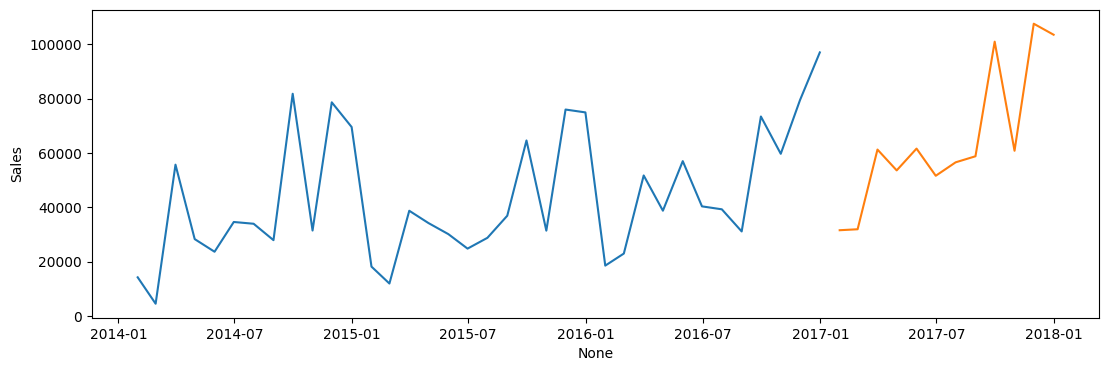

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (13,4))
sns.lineplot(x= x.index, y = 'Sales', data = x)
sns.lineplot(x= x.index, y = 'Net Sales', data = x)
plt.show()

In [ ]:
#################################
######### ARIMA Method ##########
#################################

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import dateutil
import datetime
import warnings
warnings.filterwarnings('ignore')

#fetching required columns
data = superstore[['Order Date','Sales']]
data = data.sort_values(by = 'Order Date')

#creating a ts object
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.index = data['Order Date']
data.drop(columns=['Order Date'],inplace=True, axis=1)
data = data.resample('M').sum()
data = data[:-(12)]

#create future dataset
step = dateutil.relativedelta.relativedelta(months=1)
start = data.index[len(data)-1] + step
index = pd.date_range(start, periods=12, freq='M')
columns = ['Sales']
df = pd.DataFrame(index=index, columns=columns)
#df = df.fillna(0)

#Fit the model

fit1 = sm.tsa.statespace.SARIMAX(data['Sales'], order=(1, 1, 1),seasonal_order=(1,1,1,6)).fit()
df['Net Sales']=fit1.forecast(12)
#df = df.fillna(0)
x = pd.concat([data, df])


In [ ]:
x

,Sales,Net Sales
2014-01-31,14236.8950,NaN
2014-02-28,4519.8920,NaN
2014-03-31,55691.0090,NaN
2014-04-30,28295.3450,NaN
2014-05-31,23648.2870,NaN
2014-06-30,34595.1276,NaN
2014-07-31,33946.3930,NaN
2014-08-31,27909.4685,NaN
2014-09-30,81777.3508,NaN
2014-10-31,31453.3930,NaN


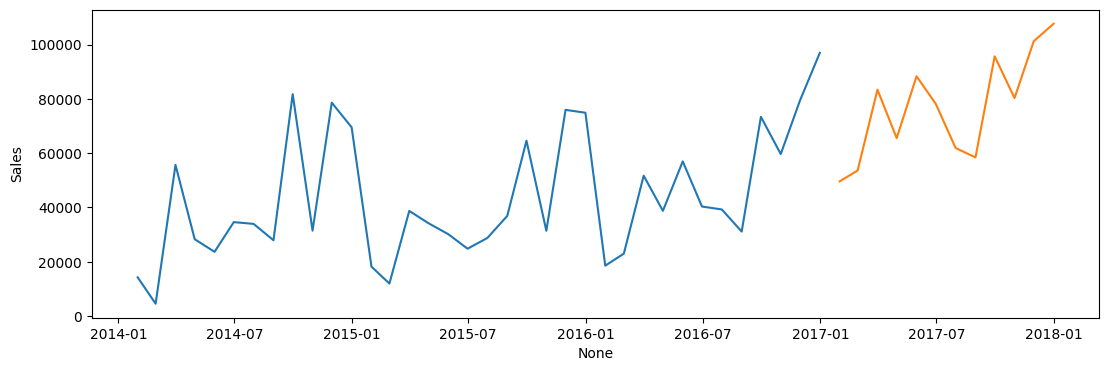

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (13,4))
sns.lineplot(x= x.index, y = 'Sales', data = x)
sns.lineplot(x= x.index, y = 'Net Sales', data = x)
plt.show()

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -331.191
Date:                           Tue, 30 Apr 2024   AIC                            672.382
Time:                                   03:10:56   BIC                            679.219
Sample:                               01-31-2014   HQIC                           674.523
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0661      0.807     -0.082      0.935      -1.647       1.515
ma.L1         -0.4447      0.798     -0.557      0.577      -2.008       1.119
ar.S.L6       -0.5980      0.547     -1.092      0.275      -1.671       0.475
ma.S.L6       -0.3527      0.843     -0.418      0.676      -2.005       1.299
sigma2      8.605e+08    1.6e-09   5.37e+17      0.000    8.61e+08    8.61e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.96   Prob(JB):                         0.10
Heteroskedasticity (H):               0.13   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.65e+33. Standard errors may be unstable.
"""

In [ ]:
fit1.resid

Order Date
2014-01-31    14236.895000
2014-02-28    -3764.342739
2014-03-31    48923.247722
2014-04-30    -2471.128627
2014-05-31    -7110.605923
2014-06-30      914.530602
2014-07-31    -3950.599341
2014-08-31    -5400.793979
2014-09-30    38195.112329
2014-10-31   -23735.231182
2014-11-30    35023.705454
2014-12-31     5877.733831
2015-01-31   -59340.201506
2015-02-28   -29229.072892
2015-03-31   -24986.518351
2015-04-30     5940.869487
2015-05-31     -556.645620
2015-06-30   -12312.951440
2015-07-31    -2534.909230
2015-08-31    13657.824190
2015-09-30   -12469.837460
2015-10-31    -1871.024479
2015-11-30    15958.446709
2015-12-31    10579.689749
2016-01-31   -21097.974902
2016-02-29    -1085.361019
2016-03-31    -5100.626100
2016-04-30     2219.091424
2016-05-31     9855.506528
2016-06-30    -7235.004930
2016-07-31     6035.242251
2016-08-31    -7915.104163
2016-09-30     8053.306157
2016-10-31    17437.889750
2016-11-30    -2626.763000
2016-12-31    18700.720497
Freq: M, dtype: f

<Axes: xlabel='Order Date'>

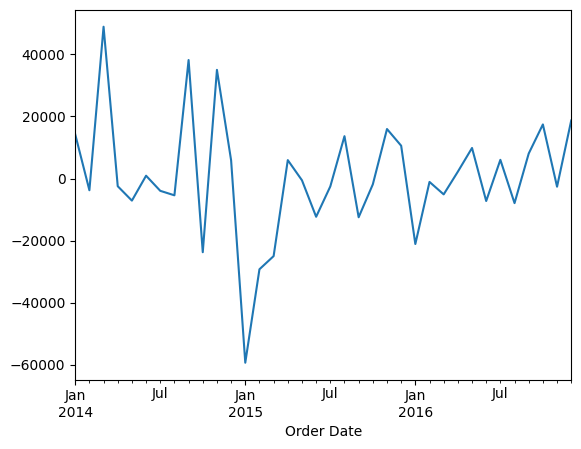

In [ ]:
fit1.resid.plot()

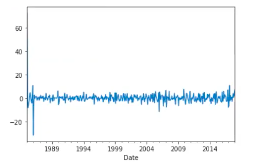

<Axes: ylabel='Density'>

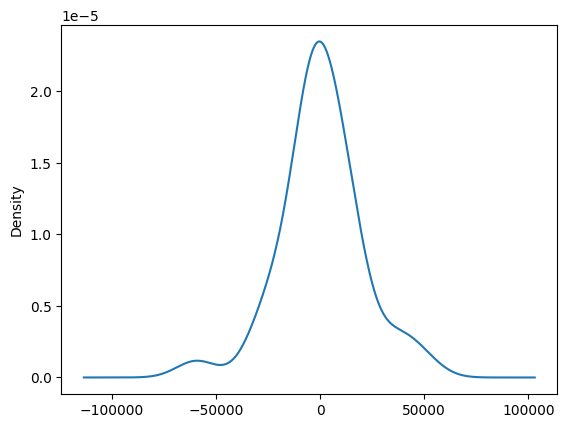

In [ ]:
fit1.resid.plot(kind='kde')

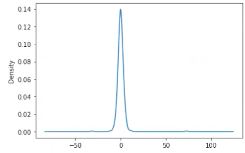

In [ ]:
fit1.mae

13511.236348953618

In [ ]:
fit1.mse

370919498.27926844

In [ ]:
data.head(10)

,Sales
Order Date,
2014-01-31,14236.8950
2014-02-28,4519.8920
2014-03-31,55691.0090
2014-04-30,28295.3450
2014-05-31,23648.2870
2014-06-30,34595.1276
2014-07-31,33946.3930
2014-08-31,27909.4685
2014-09-30,81777.3508


In [ ]:
data['prediccion']=fit1.predict()
data['residuos']=fit1.resid
data.head(10)

,Sales,prediccion,residuos
Order Date,,,
2014-01-31,14236.8950,0.000000,14236.895000
2014-02-28,4519.8920,8284.234739,-3764.342739
2014-03-31,55691.0090,6767.761278,48923.247722
2014-04-30,28295.3450,30766.473627,-2471.128627
2014-05-31,23648.2870,30758.892923,-7110.605923
2014-06-30,34595.1276,33680.596998,914.530602
2014-07-31,33946.3930,37896.992341,-3950.599341
2014-08-31,27909.4685,33310.262479,-5400.793979
2014-09-30,81777.3508,43582.238471,38195.112329


<Axes: xlabel='Order Date'>

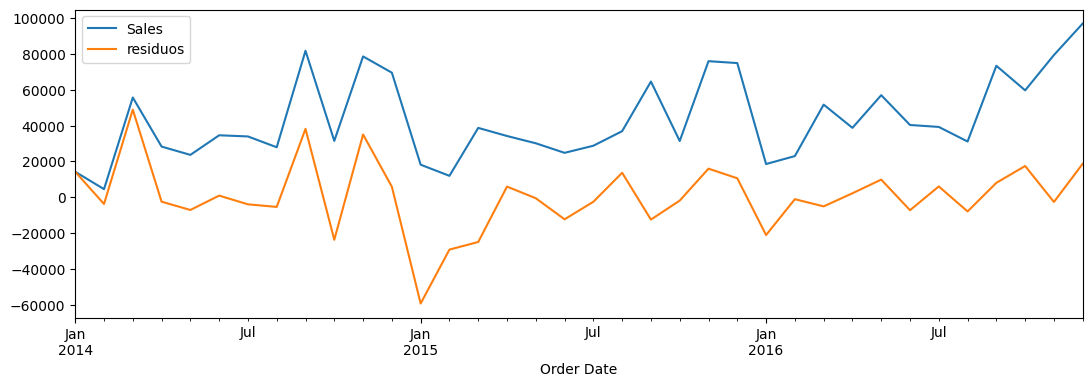

In [ ]:
data[['Sales','residuos']].plot(figsize=(13,4))

In [ ]:
mape = np.round(np.mean(np.abs(data.residuos/data.Sales)), 5)
mape

0.44509

In [ ]:
from pandas.tseries.offsets import DateOffset

In [ ]:
extra_dates=[data.index[-1]+DateOffset(months=m) for m in range (1,24)]
extra_dates

[Timestamp('2016-12-30 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-02-28 00:00:00'),
 Timestamp('2017-03-30 00:00:00'),
 Timestamp('2017-04-30 00:00:00'),
 Timestamp('2017-05-30 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-30 00:00:00'),
 Timestamp('2017-08-30 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-10-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-12-30 00:00:00'),
 Timestamp('2018-01-30 00:00:00'),
 Timestamp('2018-02-28 00:00:00'),
 Timestamp('2018-03-30 00:00:00'),
 Timestamp('2018-04-30 00:00:00'),
 Timestamp('2018-05-30 00:00:00'),
 Timestamp('2018-06-30 00:00:00'),
 Timestamp('2018-07-30 00:00:00'),
 Timestamp('2018-08-30 00:00:00'),
 Timestamp('2018-09-30 00:00:00'),
 Timestamp('2018-10-30 00:00:00')]

In [ ]:
forecast_df=pd.DataFrame(index=extra_dates,columns=data.columns)
forecast_df

,Sales,prediccion,residuos,prediccion_1
2016-12-30,NaN,NaN,NaN,NaN
2017-01-30,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN
2017-03-30,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN
2017-05-30,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN
2017-07-30,NaN,NaN,NaN,NaN
2017-08-30,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN


In [ ]:
final_df=pd.concat([data,forecast_df])
final_df

,Sales,prediccion,residuos,prediccion_1
2014-01-31,14236.8950,0.000000,14236.895000,NaN
2014-02-28,4519.8920,8673.437192,-4153.545192,NaN
2014-03-31,55691.0090,6224.182810,49466.826190,NaN
2014-04-30,28295.3450,31492.077317,-3196.732317,NaN
2014-05-31,23648.2870,29128.984889,-5480.697889,NaN
2014-06-30,34595.1276,33409.215499,1185.912101,NaN
2014-07-31,33946.3930,38320.056561,-4373.663561,NaN
2014-08-31,27909.4685,33163.839116,-5254.370616,NaN
2014-09-30,81777.3508,44866.498589,36910.852211,NaN
2014-10-31,31453.3930,55956.333322,-24502.940322,NaN


In [ ]:
fit1.predict(start=35,end=57)

2016-12-31    76544.149753
2017-01-31    40708.026597
2017-02-28    43648.795758
2017-03-31    73885.972200
2017-04-30    55794.255855
2017-05-31    78581.378839
2017-06-30    67954.355127
2017-07-31    51247.645209
2017-08-31    48082.807826
2017-09-30    84959.432709
2017-10-31    69273.751412
2017-11-30    90374.283403
2017-12-31    84019.877212
2018-01-31    56779.531680
2018-02-28    56976.754269
2018-03-31    90197.358464
2018-04-30    73186.790922
2018-05-31    95216.046379
2018-06-30    86508.917941
2018-07-31    65068.932194
2018-08-31    63414.832204
2018-09-30    98648.628818
2018-10-31    82367.611564
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
data.shape

(35, 3)